# Task 6: K-Nearest Neighbors (KNN) Classification

## Objective
To implement KNN algorithm for classification problems and understand instance-based learning.

## Tools Used
- Python
- Scikit-learn
- Pandas
- Matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Dataset Overview

The Iris dataset is a multi-class classification dataset.
Target column represents flower species.

In [3]:
df = df.drop("Id", axis=1)

In [4]:
X = df.drop("Species", axis=1)
y = df["Species"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Feature Scaling

KNN is distance-based.
Normalization ensures all features contribute equally.

In [7]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

Accuracy: 1.0


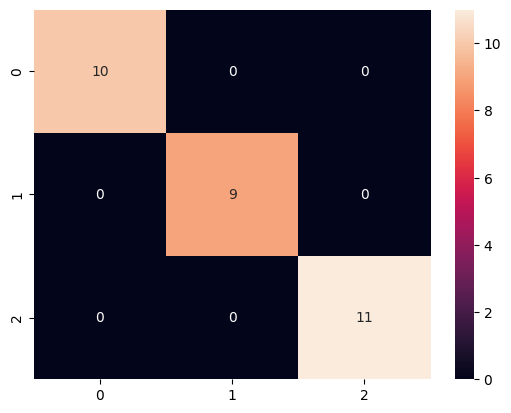

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

print(classification_report(y_test, y_pred))

## Model Evaluation

Accuracy measures overall correct predictions.
Confusion matrix shows class-wise performance.

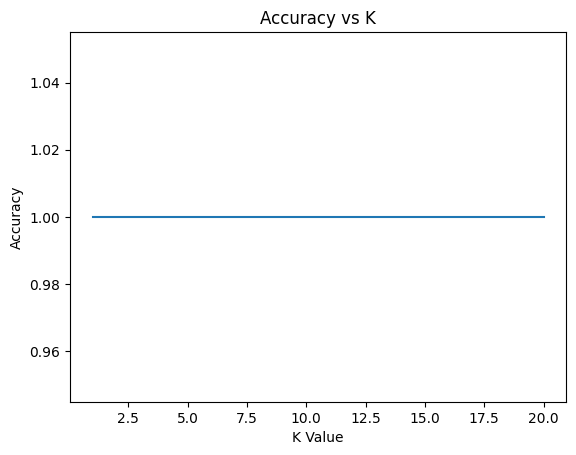

In [9]:
accuracy_scores = []

for k in range(1,21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, preds))

plt.plot(range(1,21), accuracy_scores)
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")
plt.show()

## Choosing the Right K

We tested different K values to find optimal performance.
Too small K → Overfitting.
Too large K → Underfitting.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Use only first 2 features
X_vis = df.iloc[:, 1:3].values   # SepalLength, SepalWidth
y_vis = df["Species"].values

# Convert string labels to numbers
le = LabelEncoder()
y_vis = le.fit_transform(y_vis)

# Train test split
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(
    X_vis, y_vis, test_size=0.2, random_state=42
)

# Scale
scaler_v = StandardScaler()
X_train_v = scaler_v.fit_transform(X_train_v)

# Train model
model_v = KNeighborsClassifier(n_neighbors=5)
model_v.fit(X_train_v, y_train_v)

# Create meshgrid
x_min, x_max = X_train_v[:, 0].min() - 1, X_train_v[:, 0].max() + 1
y_min, y_max = X_train_v[:, 1].min() - 1, X_train_v[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.01),
    np.arange(y_min, y_max, 0.01)
)

# Predict
Z = model_v.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_v[:, 0], X_train_v[:, 1], c=y_train_v, edgecolor='k')
plt.title("Decision Boundary (K=5)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Decision Boundary

The decision boundary shows how KNN classifies regions in feature space.

## Final Conclusion

- KNN is an instance-based learning algorithm.
- Performance depends heavily on choice of K.
- Feature scaling is essential in KNN.
- Optimal K provides best balance between bias and variance.
- Decision boundaries show classification regions clearly.